# 퍼셉트론 (Perceptron)

- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경막의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def activate(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0

In [3]:
test_cases = [(0, 0), (0, 1), (1, 0), (1, 1)]

In [4]:
AND_gate = Perceptron(np.array([0.5, 0.5]), -0.7)

for test in test_cases:
    print(f"AND{test} = {AND_gate.activate(np.array(test))}")

AND(0, 0) = 0
AND(0, 1) = 0
AND(1, 0) = 0
AND(1, 1) = 1


In [5]:
OR_gate = Perceptron(np.array([0.5, 0.5]), -0.2)

for test in test_cases:
    print(f"OR{test} = {OR_gate.activate(np.array(test))}")

OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1


In [6]:
NAND_gate = Perceptron(np.array([-0.5, -0.5]), 0.7)

for test in test_cases:
    print(f"NAND{test} = {NAND_gate.activate(np.array(test))}")

NAND(0, 0) = 1
NAND(0, 1) = 1
NAND(1, 0) = 1
NAND(1, 1) = 0


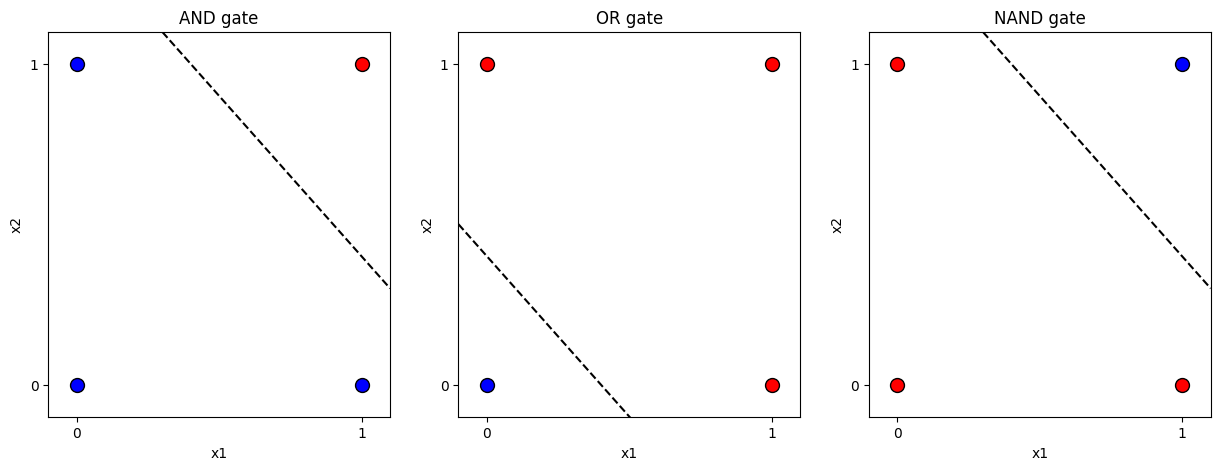

In [18]:
import matplotlib.pyplot as plt

# 시각화
inputs = np.array(test_cases)

gates = {
    "AND": AND_gate,
    "OR": OR_gate,
    "NAND": NAND_gate
}

# plt.subplot(1, 3, 1)
# plt.title("AND")
# for i, test in enumerate(test_cases):
#     plt.scatter(*test, c="r" if AND_gate.activate(inputs[i]) else "b")
# plt.xlim(-0.5, 1.5)
# plt.ylim(-0.5, 1.5)

# plt.subplot(1, 3, 2)
# plt.title("OR")
# for i, test in enumerate(test_cases):
#     plt.scatter(*test, c="r" if OR_gate.activate(inputs[i]) else "b")
# plt.xlim(-0.5, 1.5)
# plt.ylim(-0.5, 1.5)

# plt.subplot(1, 3, 3)
# plt.title("NAND")
# for i, test in enumerate(test_cases):
#     plt.scatter(*test, c="r" if NAND_gate.activate(inputs[i]) else "b")
# plt.xlim(-0.5, 1.5)
# plt.ylim(-0.5, 1.5)

fit, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (gate_name, perceptron) in enumerate(gates.items()):
    # ax[i].set_title(gate_name)
    # for i, test in enumerate(test_cases):
    #     ax[i].scatter(*test, c="r" if perceptron.activate(inputs[i]) else "b")
    # ax[i].set_xlim(-0.5, 1.5)
    # ax[i].set_ylim(-0.5, 1.5)
    outputs = np.array([perceptron.activate(x) for x in inputs])
    
    # input 값을 결과에 따라 산점도로 구분
    for (x1, x2) , y in zip(inputs, outputs):
        ax[i].scatter(x1, x2, c="r" if y else "b", s=100, edgecolors='black')
        
    # 결정경계 표현
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1]
    ax[i].plot(x_vals, y_vals, 'k--')
    ax[i].set_xlim(-0.1, 1.1)
    ax[i].set_ylim(-0.1, 1.1)
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].set_title(f"{gate_name} gate")
    ax[i].set_xlabel("x1")
    ax[i].set_ylabel("x2")

plt.show()



### XOR gate

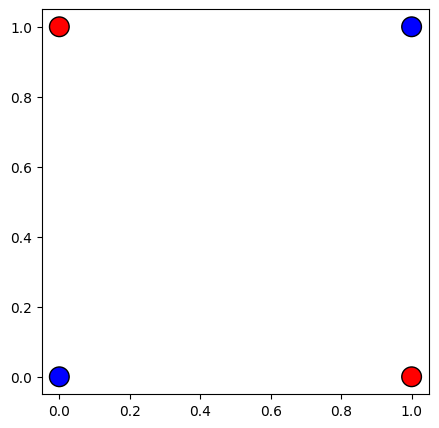

In [21]:
# XOR 데이터 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# 시각화
plt.figure(figsize=(5, 5))
# plt.scatter(X[y == 1, 0], X[y == 1, 1], c="r", label="1")
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=200, edgecolors='black')
plt.show()

## 다층 퍼셉트론 (Multi-Layer Perceptron, MLP)

In [23]:
def XOR_gate(x1, x2):
    nand_out = NAND_gate.activate(np.array([x1, x2]))
    or_out = OR_gate.activate(np.array([x1, x2]))
    return AND_gate.activate(np.array([nand_out, or_out]))

for test in test_cases:
    print(f"XOR{test} = {XOR_gate(*test)}")

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


In [ ]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(
    hidden_layer_sizes=(4, 4), # 은닉충 크기 : 은닉층 N개, 뉴런 M개
    activation='relu', # 활성화 함수: ReLU
    solver='adam', # 가중치 업데이트 방식(최적화 알고리즘): Adam
    max_iter=5000, # 학습 반목 횟수(epoch)
    random_state=42
)

mlp.fit(X, y)

pred = mlp.predict(X)

for i, test in enumerate(test_cases):
    print(f"XOR{test} = {pred[i]}")

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


In [35]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

hidden_layers = [(1,), (2,), (4,), (8,)]

for conf in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=conf,  # 은닉충 크기 : 은닉층 1개, 뉴런 2개
        activation='tanh',  # 활성화 함수
        solver='lbfgs',  # 가중치 업데이트 방식(최적화 알고리즘)
        max_iter=5000,  # 학습 반목 횟수(epoch)
        random_state=42
    )

    mlp.fit(X, y)

    pred = mlp.predict(X)

    print(f"은닉층 구조 {conf} -> XOR = {pred}")

은닉층 구조 (1,) -> XOR = [0 1 1 1]
은닉층 구조 (2,) -> XOR = [1 0 1 0]
은닉층 구조 (4,) -> XOR = [0 1 1 0]
은닉층 구조 (8,) -> XOR = [0 1 1 0]
